### Numerical Setting

The description of a discrete random variable in the numerical setting is performed by the implementation of an object `rv_discrete` from the module `scipy.stats`.  This object has the following methods:

* `object.rvs` to obtain samples
* `object.pmf` and `object.logpmf` to compute the probability mass function and its logarithm (respectively)
* `object.cdf` and `object.logcdf` to compute the cumulative density function and its logarithm (respectively)
* `object.sf` and `object.logsf` to compute the *survival function* (`1-cdf`) and its logarithm (respectively)
* `object.ppf` and `object.isf` to compute the *percent point function* (the inverse of the `cdf`) and the inverse of the survival function
* `object.expect` and `object.moment` to compute expected value and other moments
* `object.entropy` to compute entropy
* `object.median`, `object.mean`, `object.var`, `object.std` to compute the basic parameters (those can also be accessed with the method `object.stats`)
* `object.interval` to compute an interval with a given probability that contains a random realization of the distribution

We can then simulate an experiment with dice, similar to the previous section.  In this setting we represent dice by a uniform distribution on the set of the dice sides.

In [10]:
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import randint, gaussian_kde, rv_discrete

%matplotlib inline

D6 = randint(1, 7)
D100 = randint(1, 101)

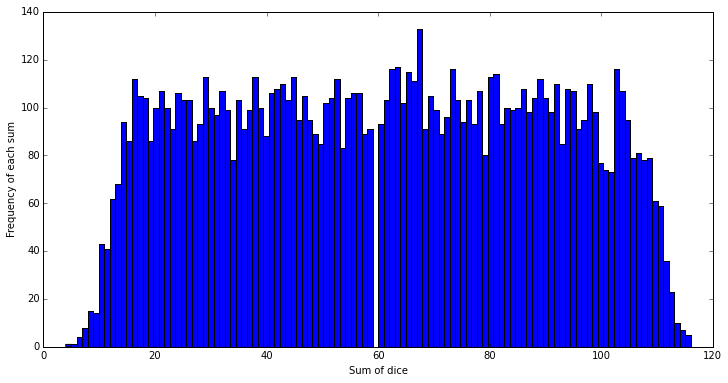

In [2]:
samples = D6.rvs(10000) + D6.rvs(10000) + D6.rvs(10000) + D100.rvs(10000)

plt.figure(figsize=(12,6))
plt.hist(samples, bins=118-4)
plt.xlabel('Sum of dice')
plt.ylabel('Frequency of each sum')
plt.show()

This gives the following diagram, that clearly indicates that our new random variable is not uniform.

One way to approach this problem is to approximate the distribution of the variable from this data, and for that task we use from the `scipy.stats` module the function `gaussian_kde`, that performs a kernel-density estimate using Gaussian kernels.

In [5]:
kernel = gaussian_kde(samples)

In [7]:
kernel(50)                        # The actual answer is 1/100

array([ 0.00991772])

In [8]:
kernel.integrate_box_1d(0,100)    # The actual answer is 177/200

0.89531430868007333

Instead of estimating this sum of random variables, and again assuming we are not familiar with the actual result, we could create an actual random variable by defining its probability mass function in terms of the probability mass functions of the summands.  The key? Convolution, of course, since the random variables for these dice are independent:  The sample space is the set of numbers from 4 to 118 (`space_sum` below), and the probabilities associated to each element (`probs_sum`) are computed as the convolution of the corresponding probabilities for each dice on their sample spaces.

In [11]:
probs_6dice = D6.pmf(np.linspace(1,6,6))
probs_100dice = D100.pmf(np.linspace(1,100,100))

probs_sum = np.convolve(np.convolve(probs_6dice, probs_6dice), np.convolve(probs_6dice, probs_100dice))
space_sum = np.linspace(4, 118, 115)

sum_of_dice = rv_discrete(name="sod", values=(space_sum, probs_sum))

sum_of_dice.pmf(50)

0.010000000000000002

In [12]:
sum_of_dice.cdf(100)

0.89500000000000068